## Importing Lib


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## Read and Understand Data

In [2]:
bike = pd.read_csv('day.csv')

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
# Check null values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Cleaning

##### 1. Drop "instant" as it just indicates the record index not useful for inference
##### 2. Drop "dteday" as the almost same data is described by "yr, mnth,weekday," columns.
##### 3. Drop "casual" and "registered" as these together describe "cnt"

In [6]:
bike.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

In [7]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


From the given data we can say that the cloumns yr,mnth,holiday,weekday,workingday,weathersit are categorical. Hence lets convert season, weekday and weathersit to categorical.

In [8]:
bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
bike['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"},inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
bike['weathersit'].replace({1:"Clear_Clouds",2:"Mist_Cloudy",3:"Light_Snow",4:"Heavy_Rain"},inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Clouds,9.305237,11.46350,43.6957,12.522300,1600


### EDA

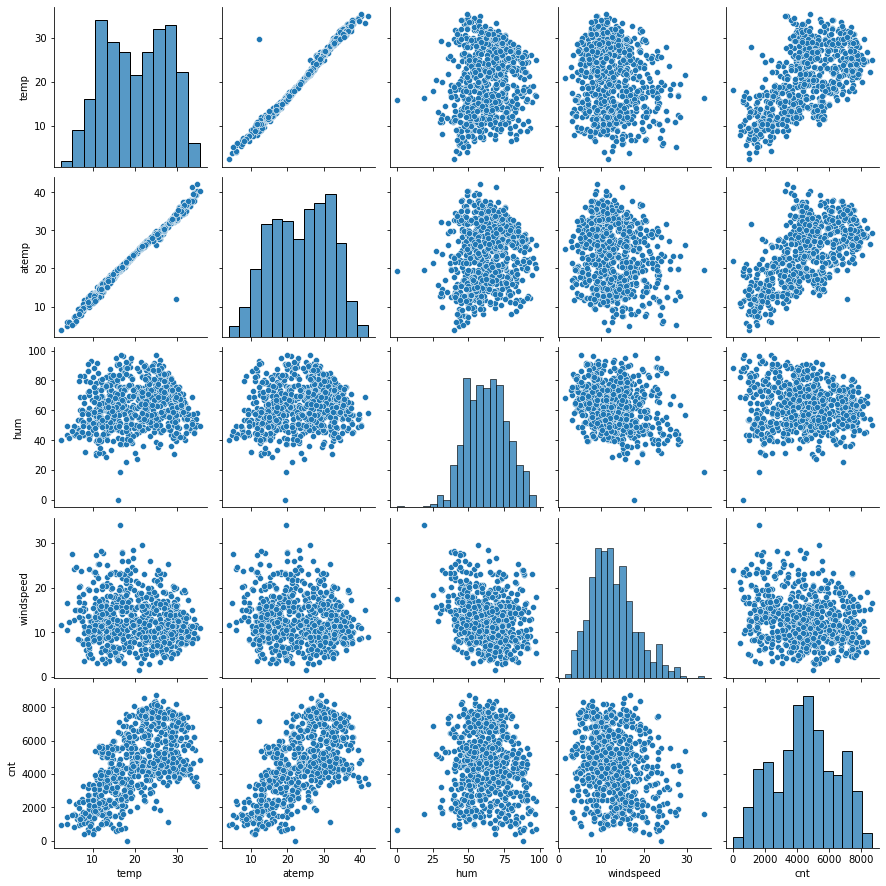

In [11]:
sns.pairplot(bike, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

- From above charts we can say that temp and atemp have a linear relation 

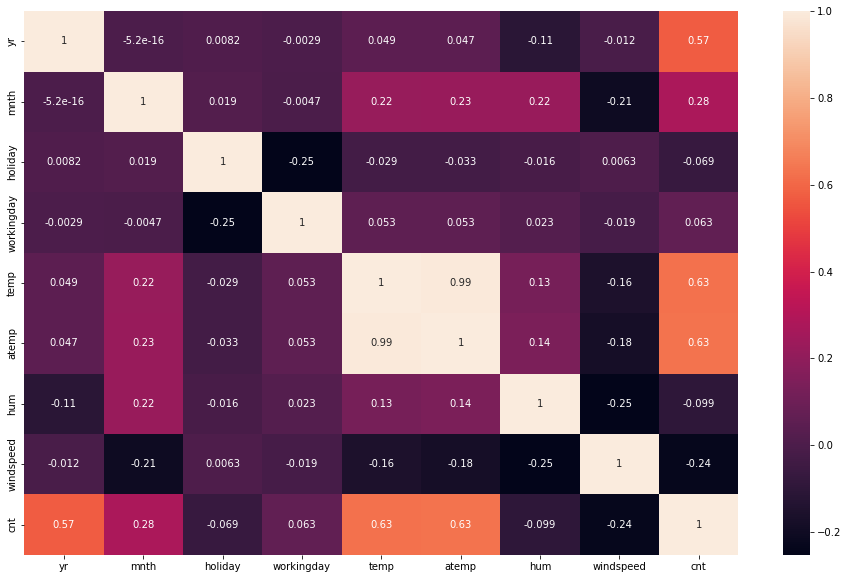

In [12]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True)
plt.show()

In [13]:
# From above heatmap we can see that atemp and temp are highly correlated hence we will drop temp
bike.drop(['temp'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Clouds,11.46350,43.6957,12.522300,1600


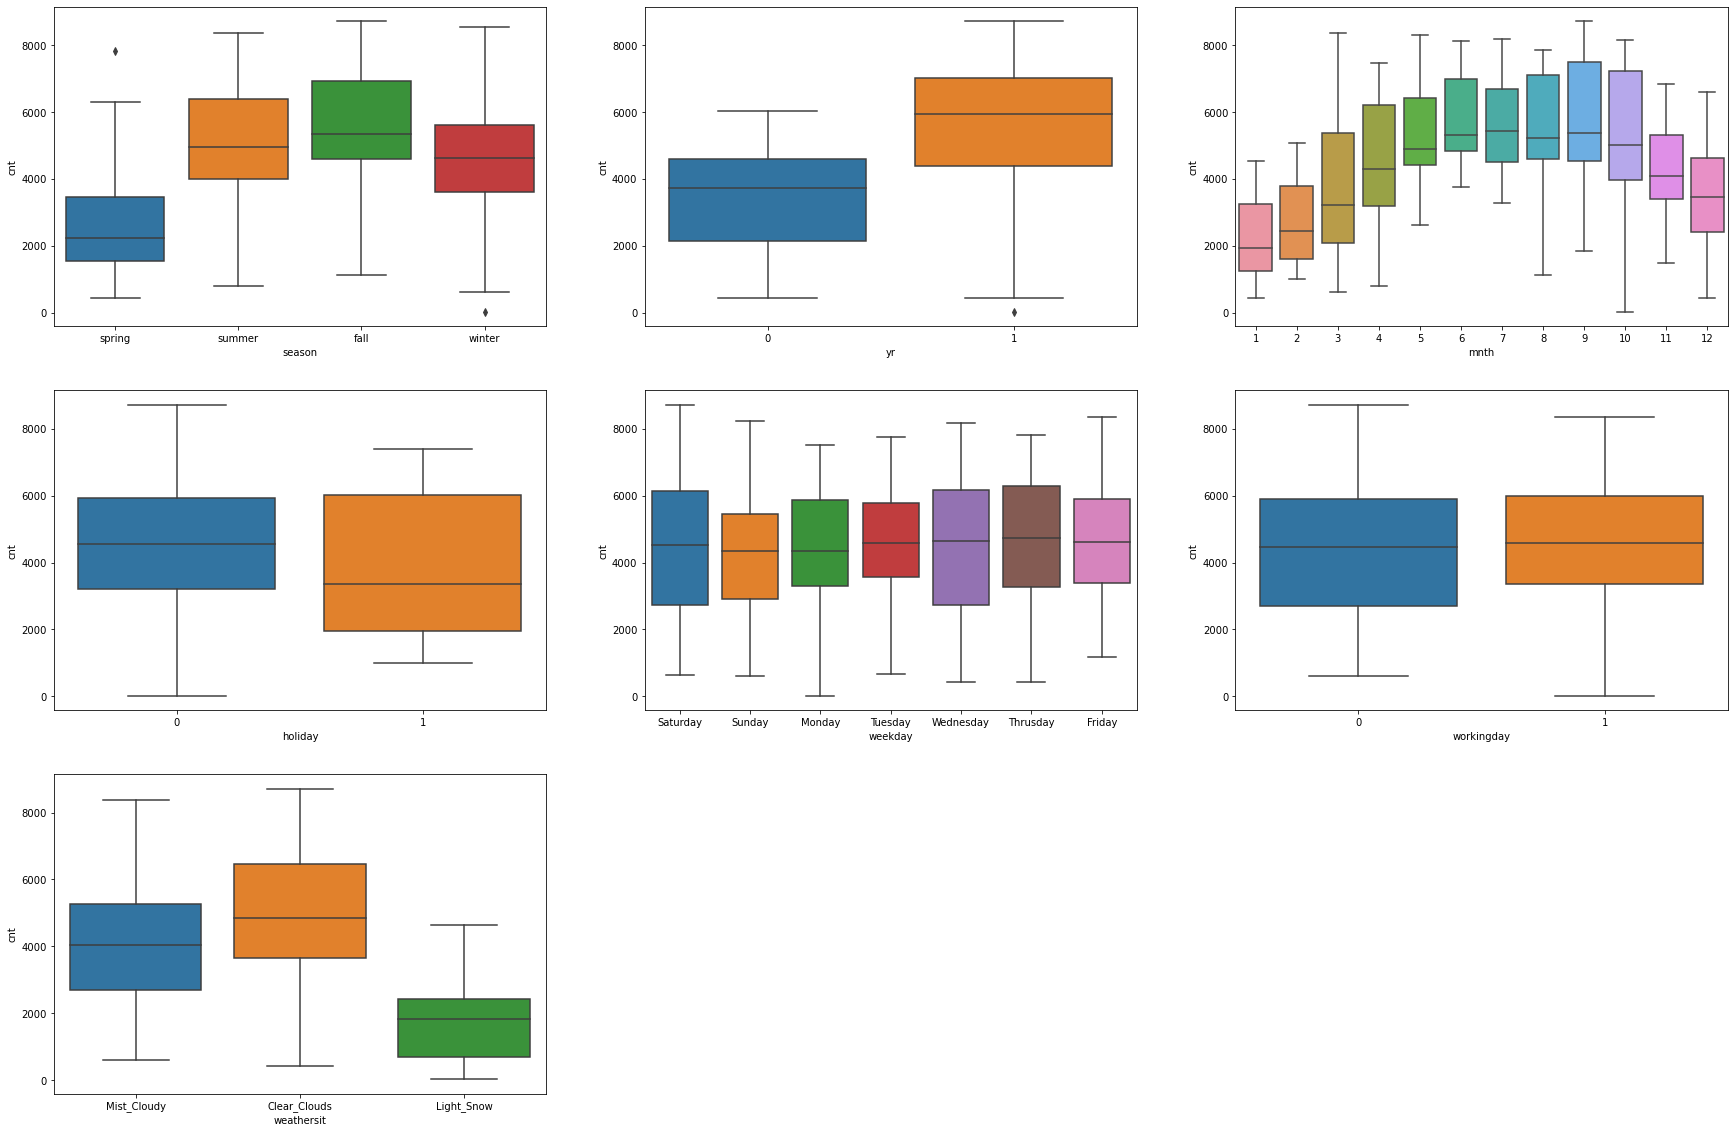

In [14]:
# Boxplot for categorical variables
chart = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(30, 20))
for i in enumerate(chart):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike, x=i[1], y='cnt')
plt.show()

#### Create Dummy variables

In [15]:
bike= pd.get_dummies(data=bike,columns=["season","mnth","weekday","weathersit"],drop_first=True)
bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist_Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Model Building

* Model training

In [16]:
bike.shape

(730, 29)

In [17]:
#Assign y the target variable and rest to x
y = bike.pop('cnt')
x = bike

#Splitting data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [18]:
x.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_2,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist_Cloudy
0,0,0,0,18.18125,80.5833,10.749882,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
#Shape of x train and test sets
print(x_train.shape)
print(x_test.shape)

(511, 28)
(219, 28)


* Scaling of numerical columns

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [21]:
col = ['atemp','hum','windspeed']
scale = MinMaxScaler()
x_train[col] = scale.fit_transform(x_train[col])
x_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_2,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist_Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


* Use RFE

In [22]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
rfe = RFE(lr,n_features_to_select=10)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [24]:
#Columns and their weightage
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 9),
 ('workingday', False, 8),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', True, 1),
 ('mnth_4', False, 4),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 11),
 ('mnth_8', False, 3),
 ('mnth_9', True, 1),
 ('mnth_10', False, 6),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_Monday', False, 16),
 ('weekday_Saturday', False, 7),
 ('weekday_Sunday', False, 15),
 ('weekday_Thrusday', False, 18),
 ('weekday_Tuesday', False, 17),
 ('weekday_Wednesday', False, 19),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Mist_Cloudy', False, 5)]

In [25]:
#Function to build a model using statsmodel
def build_model(cols):
    x_train_sm = sm.add_constant(x_train[cols])
    lm = sm.OLS(y_train, x_train_sm).fit()
    print(lm.summary())
    return lm

In [26]:
#Function to calculate VIFs
def get_vif(cols):
    df1 = x_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [27]:
#Columns supported by rfe
x_train_rfe = list(x_train.columns[rfe.support_])
x_train_rfe

['yr',
 'atemp',
 'hum',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_3',
 'mnth_5',
 'mnth_9',
 'weathersit_Light_Snow']

In [28]:
#Model 1
build_model(x_train_rfe)
get_vif(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     232.5
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          7.64e-181
Time:                        02:47:22   Log-Likelihood:                -4154.2
No. Observations:                 511   AIC:                             8330.
Df Residuals:                     500   BIC:                             8377.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3292.18

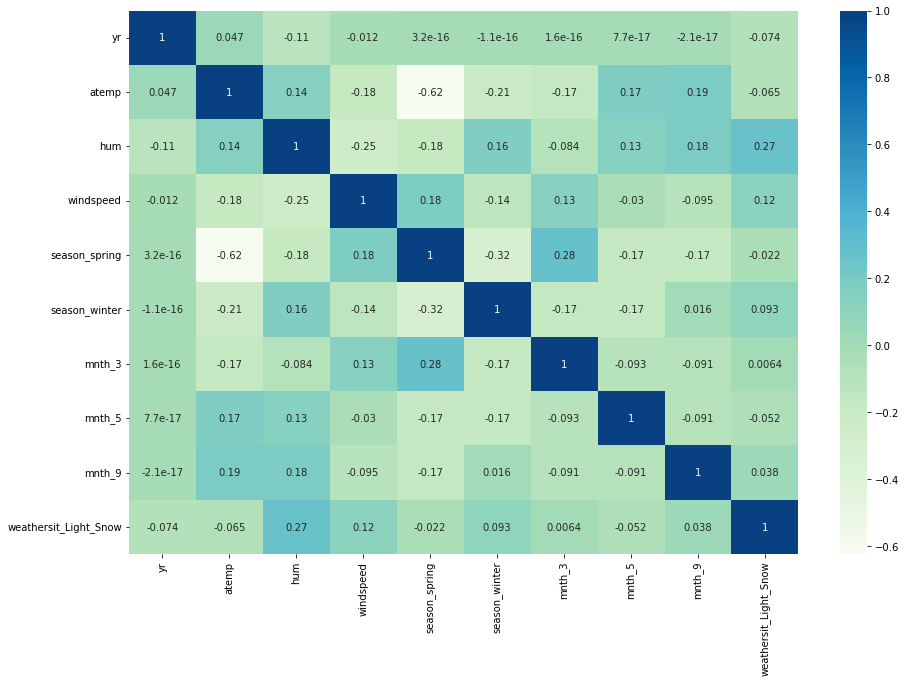

In [29]:
plt.figure(figsize = (15,10))
sns.heatmap(bike[x_train_rfe].corr(), cmap='GnBu', annot=True)
plt.show()

In [30]:
#Dropping hum as VIF value is high
x_train_rfe.remove('hum')
x_train_rfe

['yr',
 'atemp',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_3',
 'mnth_5',
 'mnth_9',
 'weathersit_Light_Snow']

In [31]:
#Model 2
build_model(x_train_rfe)
get_vif(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     220.4
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          6.08e-168
Time:                        02:47:23   Log-Likelihood:                -4187.4
No. Observations:                 511   AIC:                             8395.
Df Residuals:                     501   BIC:                             8437.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1825.93

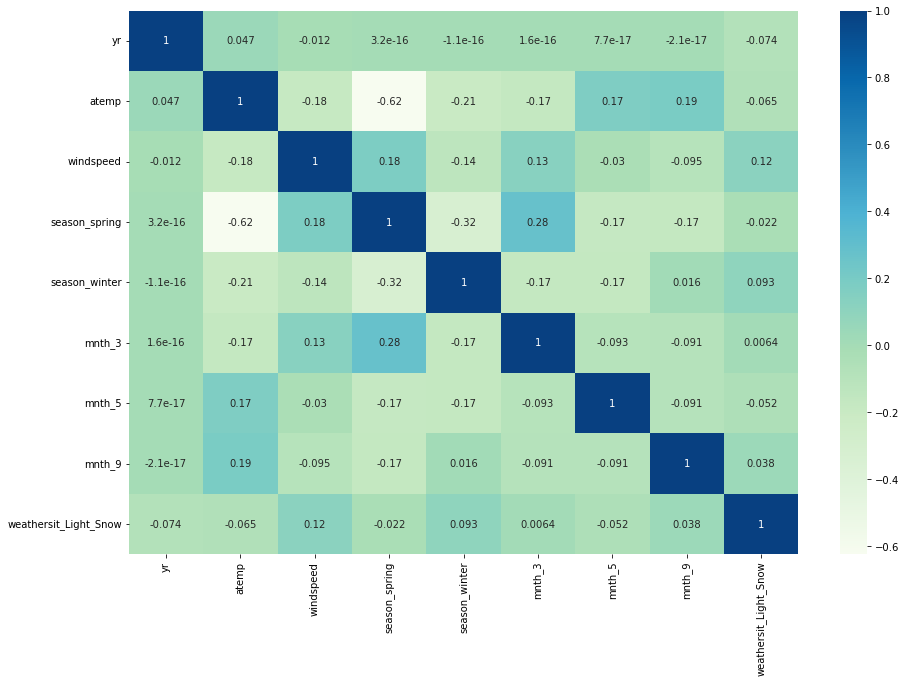

In [32]:
plt.figure(figsize = (15,10))
sns.heatmap(bike[x_train_rfe].corr(), cmap='GnBu', annot=True)
plt.show()



In [33]:
#Remove mnth_5 as p value is > .05
x_train_rfe.remove('mnth_5')
x_train_rfe

['yr',
 'atemp',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_3',
 'mnth_9',
 'weathersit_Light_Snow']

In [34]:
#Model 3
build_model(x_train_rfe)
get_vif(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     247.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.26e-168
Time:                        02:47:25   Log-Likelihood:                -4188.7
No. Observations:                 511   AIC:                             8395.
Df Residuals:                     502   BIC:                             8433.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1896.43

In [35]:
#Remove mnth_3 to see if model improves
x_train_rfe.remove('mnth_3')
x_train_rfe

['yr',
 'atemp',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_9',
 'weathersit_Light_Snow']

In [36]:
#Model 4
build_model(x_train_rfe)
get_vif(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     278.4
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.65e-168
Time:                        02:47:26   Log-Likelihood:                -4191.9
No. Observations:                 511   AIC:                             8400.
Df Residuals:                     503   BIC:                             8434.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1923.74

In [37]:
#Remove windspeed to see if model improves
x_train_rfe.remove('windspeed')
x_train_rfe

['yr',
 'atemp',
 'season_spring',
 'season_winter',
 'mnth_9',
 'weathersit_Light_Snow']

In [38]:
#Model 5
build_model(x_train_rfe)
get_vif(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     311.8
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          4.58e-166
Time:                        02:47:26   Log-Likelihood:                -4200.6
No. Observations:                 511   AIC:                             8415.
Df Residuals:                     504   BIC:                             8445.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1474.11

### Lets accept model 5 as all p-values are zero, VIF values are in acceptable range and R-squared & Adjusted R-squared values are high.

## Model Evaluation

In [39]:
def build_model_sk(x,y):
    lr1 = LinearRegression()
    lr1.fit(x,y)
    return lr1

#Build a model with 6 selected columns
lr = build_model_sk(x_train[x_train_rfe],y_train)
print(lr.intercept_,lr.coef_)

1474.1135816146743 [ 2056.9699187   4155.42966441  -999.87821128   414.17973167
   560.59951648 -2281.85146343]


In [40]:
y_train_pred = lr.predict(x_train[x_train_rfe])

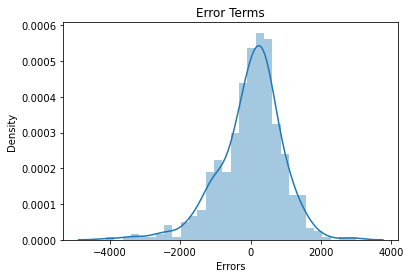

In [41]:
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')
    
plot_res_dist(y_train, y_train_pred)

## Errors are normally distributed around zero

In [42]:
#R-squared Value trained
r2_score(y_train,y_train_pred)

0.787760945302609

### Linearitly check

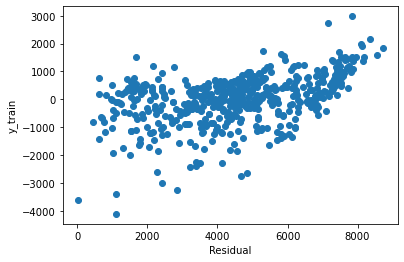

In [43]:
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [44]:
#Scale variables in x_test
num_vars = ['atemp','hum','windspeed']

#Test data to be transformed only, no fitting
x_test[num_vars] = scale.transform(x_test[num_vars])

In [45]:
y_test_pred = lr.predict(x_test[x_train_rfe])

In [46]:
# R-squared value test
r2_score(y_test,y_test_pred)

0.789463829291981

R-squared value for trained data set is 0.7878 and for test data set is 0.7895 this shows that model is performing well in test data set too.

Text(0, 0.5, 'y_test_pred')

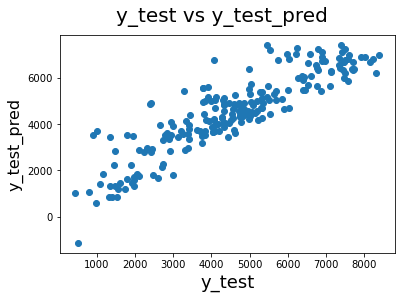

In [47]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

Minimal variance between test and predicted values

## Result/Interpretation

In [48]:
lm = build_model(x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     311.8
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          4.58e-166
Time:                        02:47:32   Log-Likelihood:                -4200.6
No. Observations:                 511   AIC:                             8415.
Df Residuals:                     504   BIC:                             8445.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1474.11

### Analysis
- The company should focus on increasing their business during the "SPRING" season.
- The ideal time would be around the month of "SEPTEMBER".
- The weather situation Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds is a time when demands are the lowest.
- 2019 has seen a considerable rise in demand hence can say that demand will gradually increase over the year.

### Below are the columns that affect the predictions.
- yr
- atemp
- season_spring
- season_winter
- mnth_9
- weathersit_Light_Snow